<a href="https://colab.research.google.com/github/Alxn-z/Diplomado-Inteligencia-Artificial-PLN/blob/Aprendizaje-Supervisado/arbol_decisiones_data_plantas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics, model_selection

In [47]:
plantas=pd.read_csv('/content/plant_growth_data.csv')
plantas.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [48]:
plantas

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0
...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0
191,sandy,8.273000,daily,organic,27.900000,69.500000,1


In [60]:
# convierte la data de texto en numeros
from sklearn.preprocessing import LabelEncoder

data = plantas.drop('Growth_Milestone', axis=1)
target = plantas['Growth_Milestone']


data_num= data.copy()

for col in ['Soil_Type', 'Water_Frequency', 'Fertilizer_Type']:
    le = LabelEncoder()
    data_num[col] = le.fit_transform(data_encoded[col])

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_encoded, target, test_size=0.2, random_state=1)


In [56]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(criterion='entropy', max_depth=3)  # como ID3
modelo.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

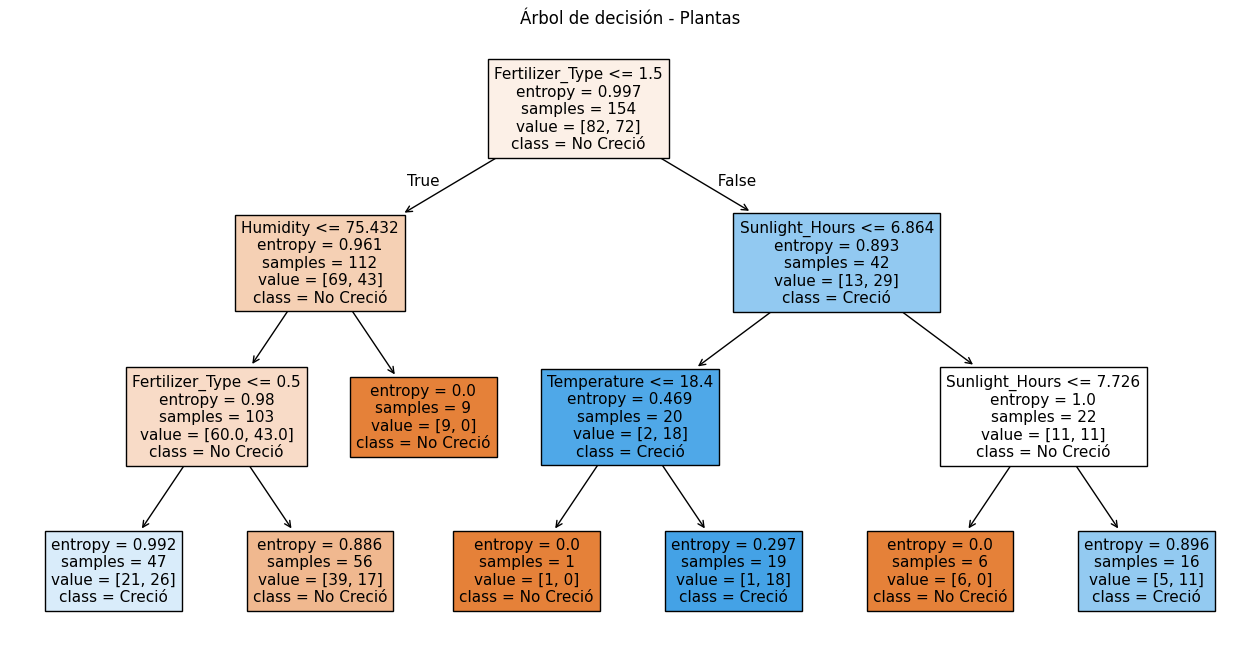

In [57]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plot_tree(modelo, feature_names=data_encoded.columns, class_names=['No Creció', 'Creció'], filled=True)
plt.title("Árbol de decisión - Plantas")
plt.show()


Precisión: 0.6410256410256411


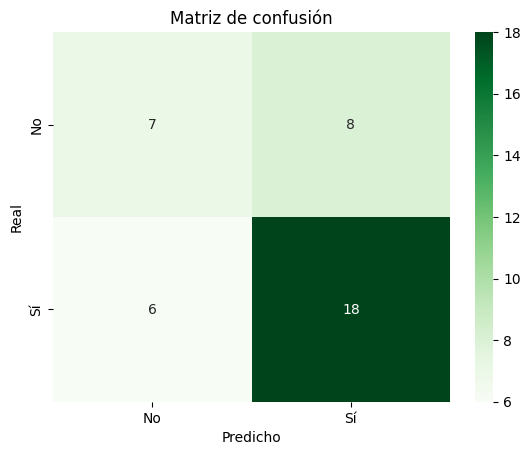

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = modelo.predict(x_test)

print("Precisión:", accuracy_score(y_test, y_pred))

import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()
